In [1]:
import keras
from keras.layers import Activation, Dense, Dropout, Conv2D, \
                         Flatten, MaxPooling2D
from keras.models import Sequential
import librosa
import librosa.display
import numpy as np
import pandas as pd
import random
import json

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np


def padding(array, xx, yy):
    """
    :param array: numpy array
    :param xx: desired height
    :param yy: desirex width
    :return: padded array
    """

    h = array.shape[0]
    w = array.shape[1]

    a = (xx - h) // 2
    aa = xx - a - h

    b = (yy - w) // 2
    bb = yy - b - w

    return np.pad(array, pad_width=((a, aa), (b, bb)), mode='constant')

CREATING RANDOM TEST DATA FROM ALL TYPES OF AUGMENTED DATA

In [3]:
with open('original.json', "r") as f:
    data1 = json.load(f)
    
x1 = data1['spect']
y1 = data1['label']

In [4]:
D = []
for ps,label in zip(x1,y1):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [5]:
import gc

del data1
del x1
del y1
gc.collect()

15

In [6]:
with open('boostedRate_0.81.json', "r") as f:
    data2 = json.load(f)
    
x2 = data2['spect']
y2 = data2['label']

In [7]:
for ps,label in zip(x2,y2):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [8]:
del data2
del x2
del y2
gc.collect()

15

In [9]:
len(D)

18329

In [10]:
random.shuffle(D)
D = D[:len(D)//2]

In [11]:
len(D)

9164

In [12]:
with open('boostedRate_1.07.json', "r") as f:
    data3 = json.load(f)
    
x3 = data3['spect']
y3 = data3['label']

In [13]:
for ps,label in zip(x3,y3):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )

In [14]:
del data3
del x3
del y3
gc.collect()

15

In [15]:
with open('boostedPitch_2.5.json', "r") as f:
    data4 = json.load(f)
    
x4 = data4['spect']
y4 = data4['label']

In [16]:
for ps,label in zip(x4,y4):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )
    
len(D)

27676

In [17]:
random.shuffle(D)
D = D[:len(D)//2]
len(D)

13838

In [18]:
del data4
del x4
del y4
gc.collect()

30

In [19]:
with open('boostedPitch_-2.5.json', "r") as f:
    data5 = json.load(f)
    
x5 = data5['spect']
y5 = data5['label']

In [20]:
for ps,label in zip(x5,y5):
    D.append( (np.array(padding(np.array(ps),128,400)), label) )
    
len(D)

23076

In [21]:
del data5
del x5
del y5
gc.collect()

15

In [22]:
random.shuffle(D)
D = D[:len(D)//2]
len(D)

11538

In [23]:
dataset = D
random.shuffle(dataset)

#train = dataset[:44000]
#dataset = dataset[44000:]
#validate = dataset[:1900]
test = dataset

#X_train, y_train = zip(*train)
#X_validate, y_validate = zip(*validate)
X_test, y_test = zip(*test)

# Reshape for CNN input
#X_train = np.array([x.reshape( (128, 400, 1) ) for x in X_train])
#X_validate = np.array([x.reshape( (128, 400, 1) ) for x in X_validate])
X_test = np.array([x.reshape( (128, 400, 1) ) for x in X_test])

In [24]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#y=to_categorical(labelencoder.fit_transform(y))
#y
#y_train = np.array(to_categorical(labelencoder.fit_transform(y_train)))
#y_validate = np.array(to_categorical(labelencoder.fit_transform(y_validate)))
y_test = np.array(to_categorical(labelencoder.fit_transform(y_test)))

In [25]:
del dataset
del D
del test
gc.collect()

30

In [26]:
X_test.shape, y_test.shape

((11538, 128, 400, 1), (11538, 2))

In [1]:
import json
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np

SPECTROGRAM & LOSS/ACCURACY CURVE OF ORIGINAL MODEL

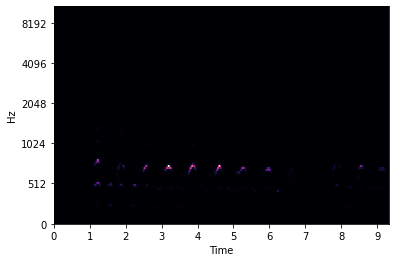

In [22]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
ps = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

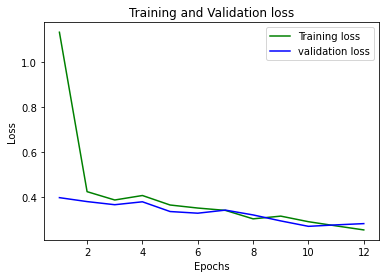

In [16]:
with open('original_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

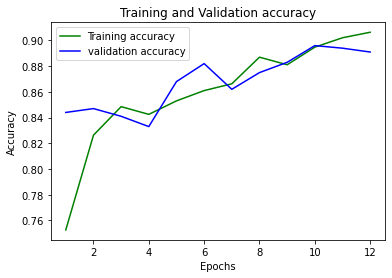

In [17]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
reconstructed_model = keras.models.load_model("original_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 84s 197ms/step - loss: 0.3503 - accuracy: 0.8591
Test loss: 0.35028016567230225
Test accuracy: 0.8590743541717529


SPECTROGRAM & LOSS/ACCURACY CURVE OF BOOSTED_PITCH_2.5 MODEL

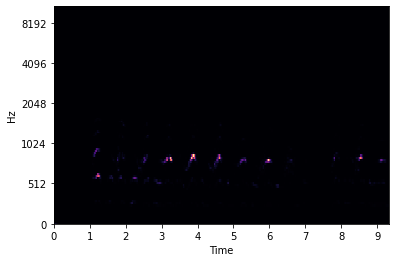

In [18]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
y_changed = librosa.effects.pitch_shift(y, sr, n_steps=2.5)
ps = librosa.feature.melspectrogram(y=y_changed, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

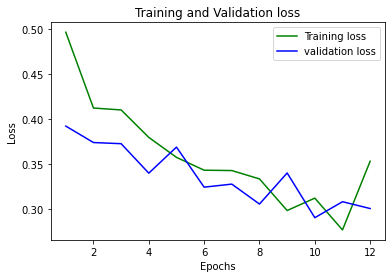

In [20]:
with open('BOOSTED_PITCH_2.5_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

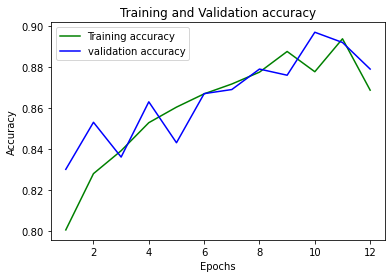

In [21]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [29]:
reconstructed_model = keras.models.load_model("boostedPitch_2.5_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 68s 188ms/step - loss: 0.3732 - accuracy: 0.8552
Test loss: 0.37322181463241577
Test accuracy: 0.85517418384552


SPECTROGRAM & LOSS/ACCURACY CURVE OF BOOSTED_PITCH_-2.5 MODEL

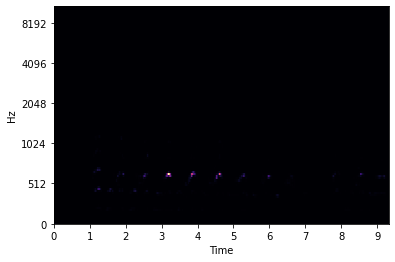

In [23]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
y_changed = librosa.effects.pitch_shift(y, sr, n_steps=-2.5)
ps = librosa.feature.melspectrogram(y=y_changed, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

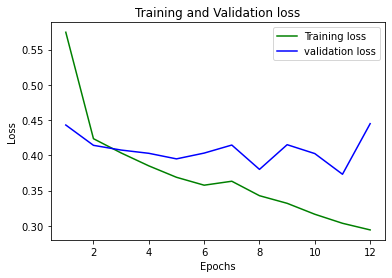

In [24]:
with open('BOOSTED_PITCH_-2.5_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

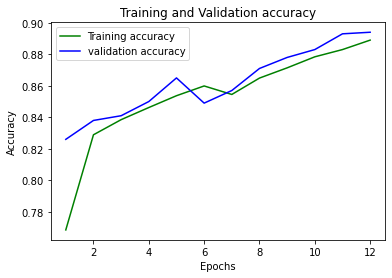

In [25]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [32]:
reconstructed_model = keras.models.load_model("slowedPitch_-2.5_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 76s 210ms/step - loss: 0.4192 - accuracy: 0.8573
Test loss: 0.41922613978385925
Test accuracy: 0.8572542667388916


SPECTROGRAM & LOSS/ACCURACY CURVE OF BOOSTED_RATE_1.07 MODEL

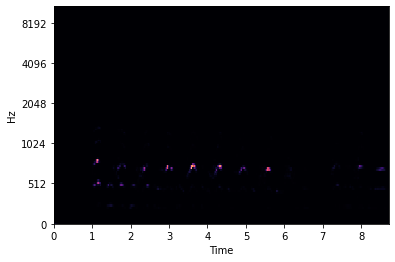

In [26]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
y_changed = librosa.effects.time_stretch(y, rate=1.07)
ps = librosa.feature.melspectrogram(y=y_changed, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

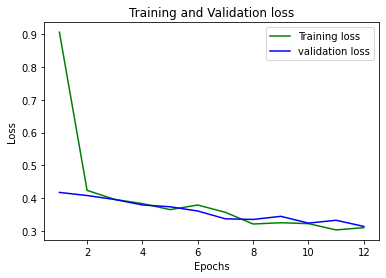

In [28]:
with open('BOOSTED_RATE_1.07_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

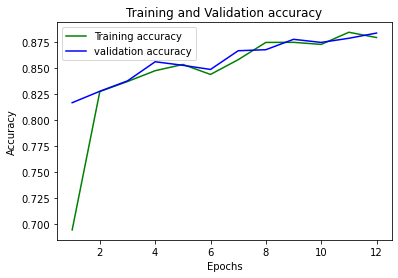

In [29]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
reconstructed_model = keras.models.load_model("boostedRate_1.07_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 73s 201ms/step - loss: 0.3911 - accuracy: 0.8594
Test loss: 0.3910920023918152
Test accuracy: 0.8594210147857666




SPECTROGRAM & LOSS/ACCURACY CURVE OF BOOSTED_RATE_0.81 MODEL



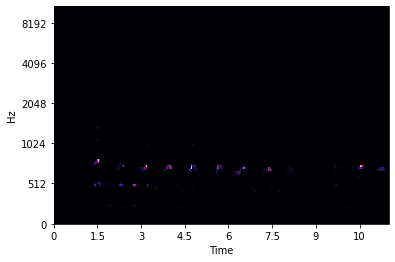

In [30]:
file_name = 'F01/Session1/wav_arrayMic/0001.wav'
y, sr = librosa.load(file_name)
y_changed = librosa.effects.time_stretch(y, rate=0.81)
ps = librosa.feature.melspectrogram(y=y_changed, sr=sr)
librosa.display.specshow(ps, y_axis='mel', x_axis='time')

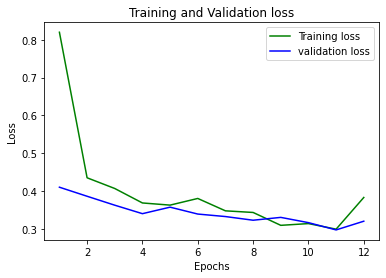

In [31]:
with open('BOOSTED_RATE_0.81_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

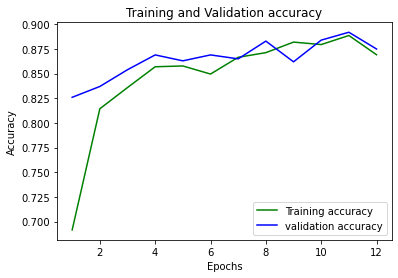

In [32]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [34]:
reconstructed_model = keras.models.load_model("boostedRate_0.81_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 78s 214ms/step - loss: 0.3623 - accuracy: 0.8544
Test loss: 0.36233484745025635
Test accuracy: 0.8543941974639893




FINAL MODEL ALL COMBINED

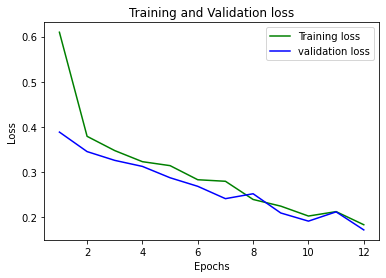

In [34]:
with open('Final_history.json', "r") as f:
    history = json.load(f)
    
loss_train = history['loss']
loss_val = history['val_loss']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

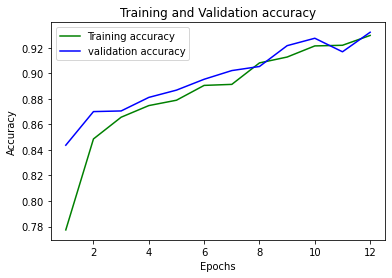

In [36]:
loss_train = history['accuracy']
loss_val = history['val_accuracy']
epochs = range(1,13)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
reconstructed_model = keras.models.load_model("CNN_FinalCombined_model")
score = reconstructed_model.evaluate(x=X_test,y=y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

361/361 [==============================] - 73s 200ms/step - loss: 0.1547 - accuracy: 0.9412
Test loss: 0.15474000573158264
Test accuracy: 0.941150963306427
